In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
conn = sqlite3.connect("../db/movielens.db")

In [15]:
query = """
SELECT 
    u.UserID,
    u.Gender,
    u.Age,
    u.Occupation,
    u.Zipcode,
    m.MovieID,
    m.Title,
    m.Genres,
    m.Year,
    r.Rating,
    r.Timestamp
FROM ratings AS r
INNER JOIN users AS u ON r.UserID = u.UserID
INNER JOIN movies AS m ON r.MovieID = m.MovieID;
"""
df = pd.read_sql_query(query, conn)

In [16]:
conn.close()

In [17]:
df.head()

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Genres,Year,Rating,Timestamp
0,1,F,1,10,48067,1193,One Flew Over the Cuckoo's Nest,Drama,1975,5,978300760
1,1,F,1,10,48067,661,James and the Giant Peach,Animation|Children's|Musical,1996,3,978302109
2,1,F,1,10,48067,914,My Fair Lady,Musical|Romance,1964,3,978301968
3,1,F,1,10,48067,3408,Erin Brockovich,Drama,2000,4,978300275
4,1,F,1,10,48067,2355,"Bug's Life, A",Animation|Children's|Comedy,1998,5,978824291


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zipcode     1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Title       1000209 non-null  object
 7   Genres      1000209 non-null  object
 8   Rating      1000209 non-null  int64 
 9   Timestamp   1000209 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [18]:
df['Genres'] = df['Genres'].str.split('|')
df = df.explode('Genres').reset_index(drop=True)

In [20]:
df['YearofRating'] = pd.to_datetime(df['Timestamp'], unit='s').dt.year

In [21]:
df

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Genres,Year,Rating,Timestamp,YearofRating
0,1,F,1,10,48067,1193,One Flew Over the Cuckoo's Nest,Drama,1975,5,978300760,2000
1,1,F,1,10,48067,661,James and the Giant Peach,Animation,1996,3,978302109,2000
2,1,F,1,10,48067,661,James and the Giant Peach,Children's,1996,3,978302109,2000
3,1,F,1,10,48067,661,James and the Giant Peach,Musical,1996,3,978302109,2000
4,1,F,1,10,48067,914,My Fair Lady,Musical,1964,3,978301968,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,6040,M,25,6,11106,1096,Sophie's Choice,Drama,1982,4,956715648,2000
2101811,6040,M,25,6,11106,1097,E.T. the Extra-Terrestrial,Children's,1982,4,956715569,2000
2101812,6040,M,25,6,11106,1097,E.T. the Extra-Terrestrial,Drama,1982,4,956715569,2000
2101813,6040,M,25,6,11106,1097,E.T. the Extra-Terrestrial,Fantasy,1982,4,956715569,2000


DATA EXPLORATION TO ANSWER QUESTIONS IDENTIFIED IN notebooks/README

Gender Distribution

In [32]:
user_df = df.drop_duplicates(subset='UserID')
gender_counts = user_df['Gender'].value_counts()

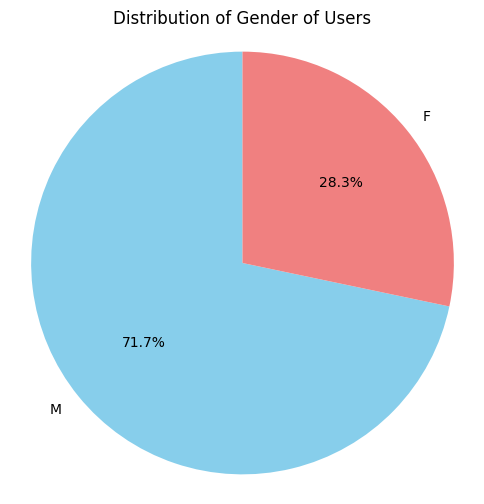

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "lightcoral"]
)
plt.title("Distribution of Gender of Users")
plt.axis("equal")
plt.show()

In [35]:
genre_gender_counts = df.groupby(['Gender','Genres']).size().reset_index(name='Count')
genre_gender_counts

,Gender,Genres,Count
0,F,Action,45650
1,F,Adventure,27332
2,F,Animation,12221
3,F,Children's,21317
4,F,Comedy,96271
5,F,Crime,16442
6,F,Documentary,1940
7,F,Drama,98153
8,F,Fantasy,8718
9,F,Film-Noir,4202


In [37]:
# for each gender, get the top 5 genres
top5_genres_per_gender = genre_gender_counts.groupby('Gender').apply(
    lambda x:x.sort_values(by='Count', ascending=False).head(5)
)
top5_genres_per_gender.reset_index(drop=True)

C:\Users\elias\AppData\Local\Temp\ipykernel_23772\32887614.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Gender,Genres,Count
0,F,Drama,98153
1,F,Comedy,96271
2,F,Romance,50297
3,F,Action,45650
4,F,Thriller,40308
5,M,Comedy,260309
6,M,Drama,256376
7,M,Action,211807
8,M,Thriller,149372
9,M,Sci-Fi,129894


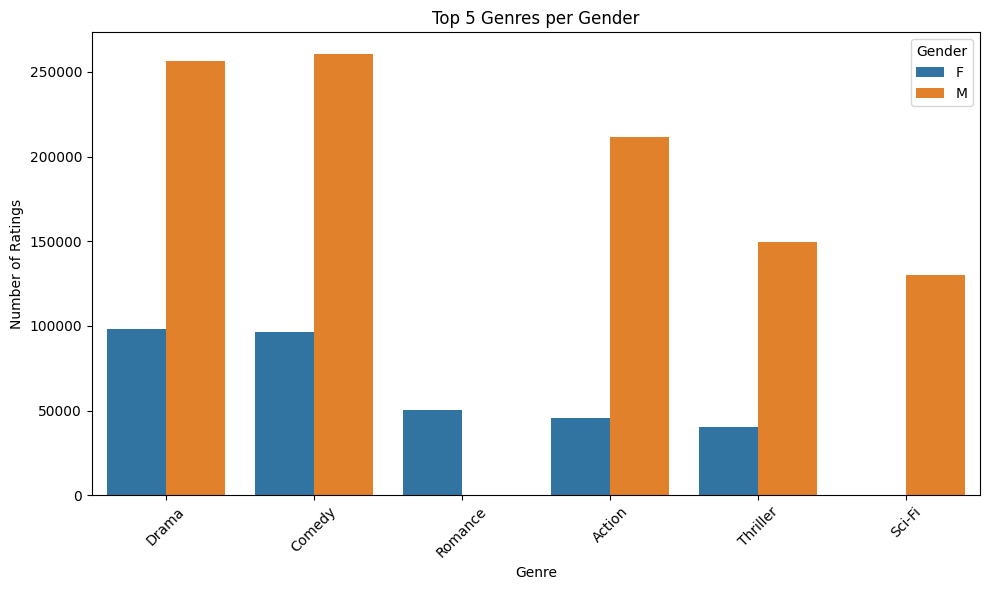

In [38]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_genres_per_gender,
    x='Genres',
    y='Count',
    hue='Gender'
)
plt.title('Top 5 Genres per Gender')
plt.ylabel('Number of Ratings')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

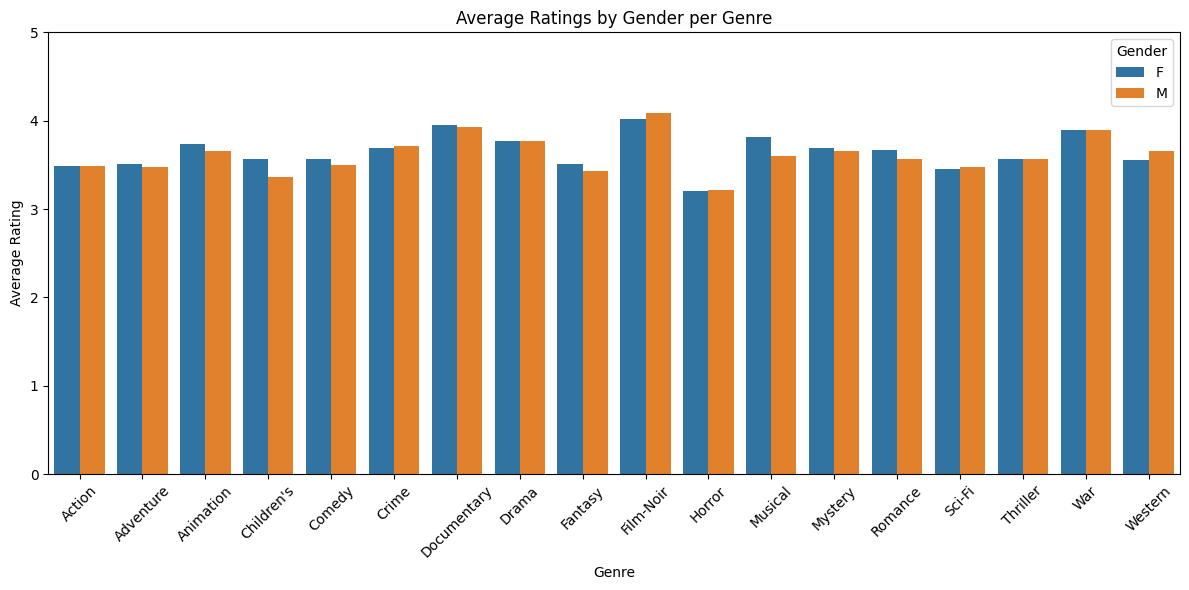

In [39]:
ratings_by_gender_genre = df.groupby(['Gender', 'Genres'])['Rating'].mean().reset_index()

ratings_by_gender_genre['Rating'] = ratings_by_gender_genre['Rating'].round(2)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ratings_by_gender_genre,
    x='Genres',
    y='Rating',
    hue='Gender'
)
plt.title('Average Ratings by Gender per Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

Age Exploration

In [ ]:
age_map = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}
df['AgeGroup'] = df['Age'].map(age_map)
df.head()

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Genres,Year,Rating,Timestamp,YearofRating,AgeGroup
0,1,F,1,10,48067,1193,One Flew Over the Cuckoo's Nest,Drama,1975,5,978300760,2000,Under 18
1,1,F,1,10,48067,661,James and the Giant Peach,Animation,1996,3,978302109,2000,Under 18
2,1,F,1,10,48067,661,James and the Giant Peach,Children's,1996,3,978302109,2000,Under 18
3,1,F,1,10,48067,661,James and the Giant Peach,Musical,1996,3,978302109,2000,Under 18
4,1,F,1,10,48067,914,My Fair Lady,Musical,1964,3,978301968,2000,Under 18


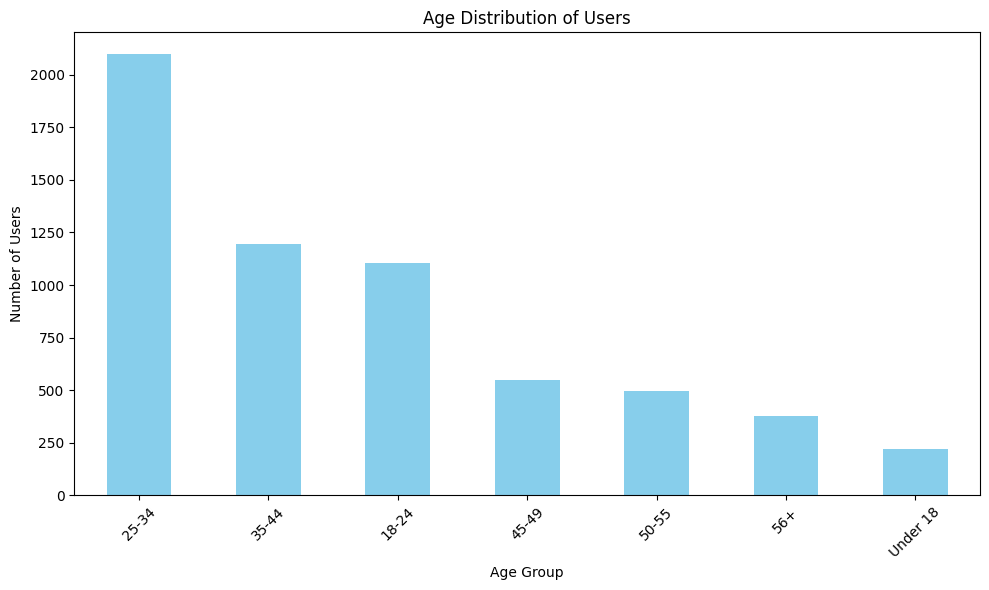

In [42]:
age_counts = df[['UserID', 'AgeGroup']].drop_duplicates()['AgeGroup'].value_counts()

plt.figure(figsize=(10,6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
top_genres_age = (
    df[['UserID', 'AgeGroup', 'Genres']].drop_duplicates()
    .groupby(['AgeGroup', 'Genres'])
    .size()
    .reset_index(name='count')
    .sort_values(['AgeGroup', 'count'], ascending=[True, False])
)

top5_genres_age = top_genres_age.groupby('AgeGroup').head(5)

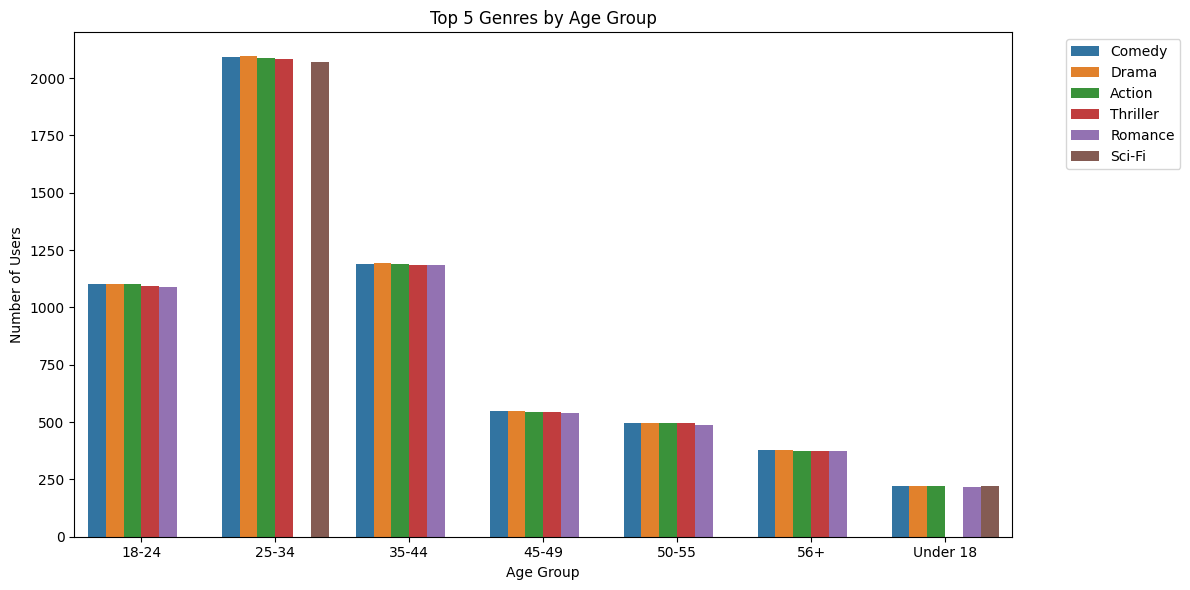

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top5_genres_age,
    x='AgeGroup',
    y='count',
    hue='Genres')
plt.title("Top 5 Genres by Age Group")
plt.ylabel("Number of Users")
plt.xlabel("Age Group")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

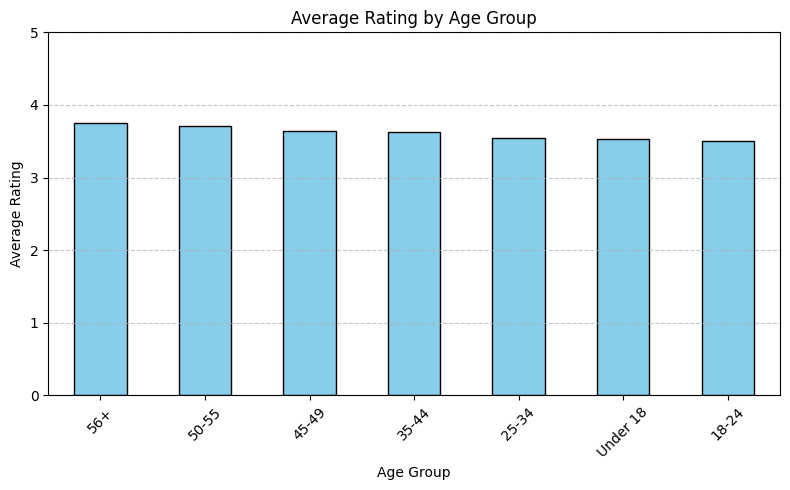

In [48]:
avg_rating_by_age = df.groupby('AgeGroup')['Rating'].mean().sort_values(ascending=False)
# Plotting
plt.figure(figsize=(8, 5))
avg_rating_by_age.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Rating by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

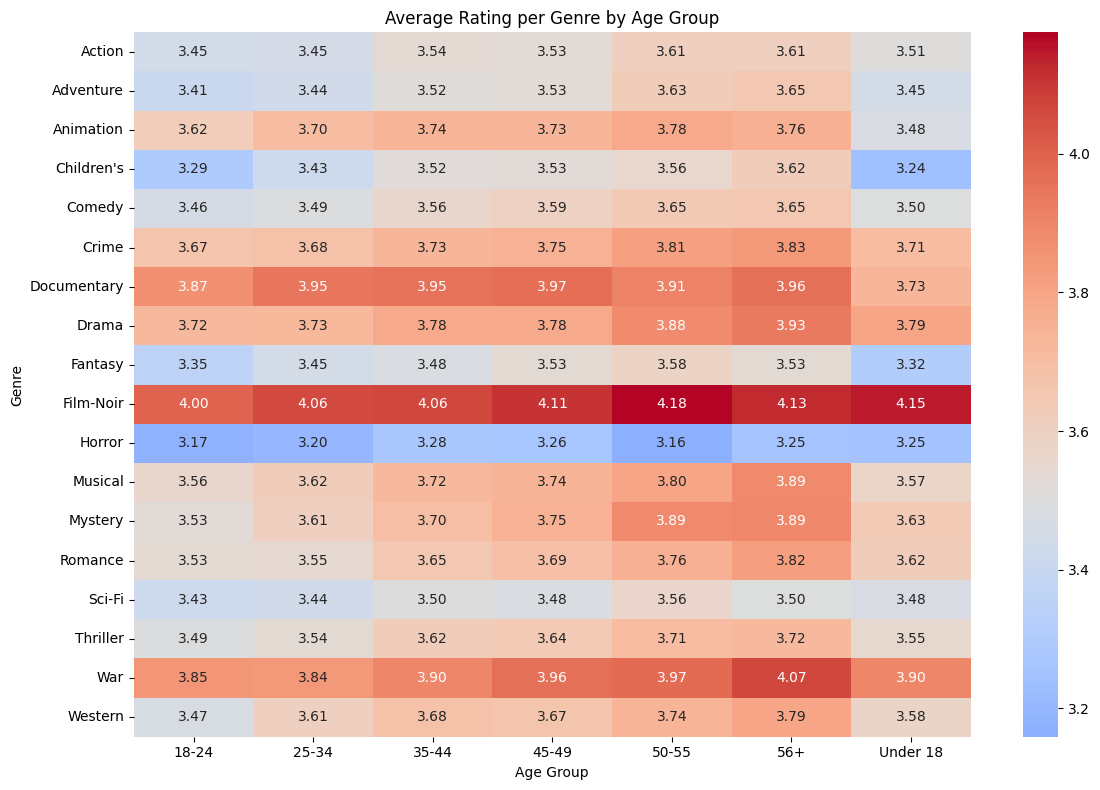

In [49]:
# Group by AgeGroup and Genre, then calculate average rating
avg_rating_age_genre = df.groupby(['AgeGroup', 'Genres'])['Rating'].mean().reset_index()

# Pivot the table to make it suitable for heatmap
pivot_table = avg_rating_age_genre.pivot(index='Genres', columns='AgeGroup', values='Rating')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", center=3.5, fmt=".2f")

plt.title("Average Rating per Genre by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


Let's switch to occupation

In [ ]:
# Define the occupation mapping
occupation_labels = {
    0: "other", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student",
    5: "customer service", 6: "doctor/health care", 7: "executive/managerial", 8: "farmer",
    9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired",
    14: "sales/marketing", 15: "scientist", 16: "self-employed", 17: "technician/engineer",
    18: "tradesman/craftsman", 19: "unemployed", 20: "writer"
}

# Map occupation labels
df['OccupationLabel'] = df['Occupation'].map(occupation_labels)

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Genres,Year,Rating,Timestamp,YearofRating,AgeGroup,OccupationLabel
0,1,F,1,10,48067,1193,One Flew Over the Cuckoo's Nest,Drama,1975,5,978300760,2000,Under 18,K-12 student
1,1,F,1,10,48067,661,James and the Giant Peach,Animation,1996,3,978302109,2000,Under 18,K-12 student
2,1,F,1,10,48067,661,James and the Giant Peach,Children's,1996,3,978302109,2000,Under 18,K-12 student
3,1,F,1,10,48067,661,James and the Giant Peach,Musical,1996,3,978302109,2000,Under 18,K-12 student
4,1,F,1,10,48067,914,My Fair Lady,Musical,1964,3,978301968,2000,Under 18,K-12 student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,6040,M,25,6,11106,1096,Sophie's Choice,Drama,1982,4,956715648,2000,25-34,doctor/health care
2101811,6040,M,25,6,11106,1097,E.T. the Extra-Terrestrial,Children's,1982,4,956715569,2000,25-34,doctor/health care
2101812,6040,M,25,6,11106,1097,E.T. the Extra-Terrestrial,Drama,1982,4,956715569,2000,25-34,doctor/health care
2101813,6040,M,25,6,11106,1097,E.T. the Extra-Terrestrial,Fantasy,1982,4,956715569,2000,25-34,doctor/health care


In [55]:
occupancy_counts = df[['UserID', 'OccupationLabel']].drop_duplicates()['OccupationLabel'].value_counts()

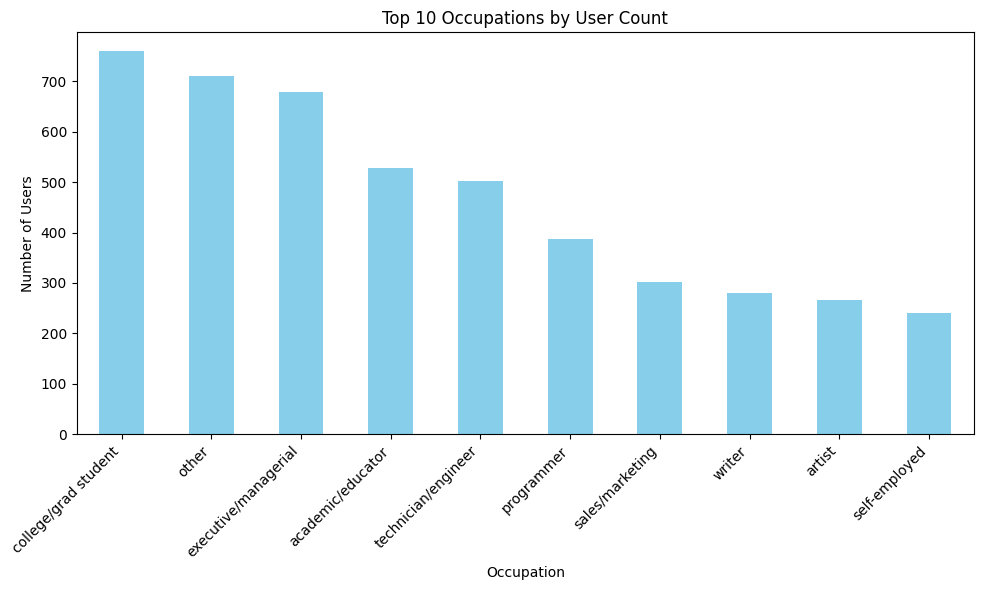

In [56]:
plt.figure(figsize=(10, 6))
occupancy_counts.head(10).plot(kind='bar', color='skyblue')

plt.title("Top 10 Occupations by User Count")
plt.xlabel("Occupation")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [57]:
# Count genre occurrences per occupation
genre_by_occupation = (
    df[['UserID', 'OccupationLabel', 'Genres']].drop_duplicates()
    .groupby(['OccupationLabel', 'Genres'])
    .size()
    .reset_index(name='UserCount')
)
genre_by_occupation

,OccupationLabel,Genres,UserCount
0,K-12 student,Action,194
1,K-12 student,Adventure,189
2,K-12 student,Animation,178
3,K-12 student,Children's,183
4,K-12 student,Comedy,195
...,...,...,...
373,writer,Romance,276
374,writer,Sci-Fi,274
375,writer,Thriller,278
376,writer,War,269


In [58]:
# Get top 5 genres per occupation
top_genres_per_occupation = (
    genre_by_occupation
    .sort_values(['OccupationLabel', 'UserCount'], ascending=[True, False])
    .groupby('OccupationLabel')
    .head(5)
)

In [59]:
top_genres_per_occupation

,OccupationLabel,Genres,UserCount
4,K-12 student,Comedy,195
14,K-12 student,Sci-Fi,195
0,K-12 student,Action,194
7,K-12 student,Drama,194
13,K-12 student,Romance,194
...,...,...,...
364,writer,Comedy,281
367,writer,Drama,281
360,writer,Action,278
375,writer,Thriller,278


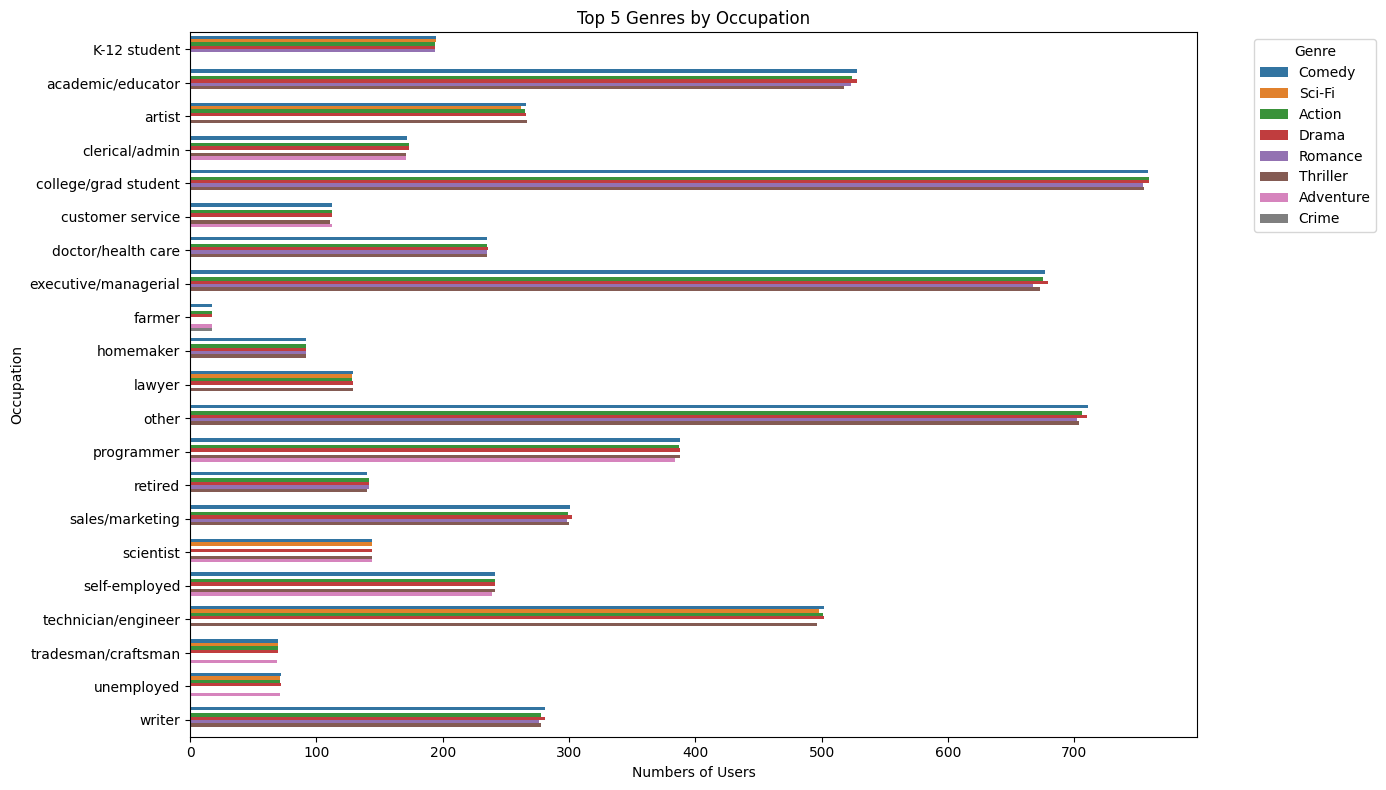

In [60]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_genres_per_occupation,
    x='UserCount',
    y='OccupationLabel',
    hue='Genres'
)
plt.title('Top 5 Genres by Occupation')
plt.xlabel('Numbers of Users')
plt.ylabel('Occupation')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Group by Occupation and Genre to get average ratings
occupation_genre_ratings = df.groupby(['OccupationLabel', 'Genres'])['Rating'].mean().reset_index()

,OccupationLabel,Genres,Rating
0,K-12 student,Action,3.497116
1,K-12 student,Adventure,3.425658
2,K-12 student,Animation,3.463956
3,K-12 student,Children's,3.220679
4,K-12 student,Comedy,3.497200
...,...,...,...
373,writer,Romance,3.469661
374,writer,Sci-Fi,3.390184
375,writer,Thriller,3.461546
376,writer,War,3.798393


In [64]:
heatmap_data_occ = occupation_genre_ratings.pivot(index='Genres', columns='OccupationLabel', values='Rating')

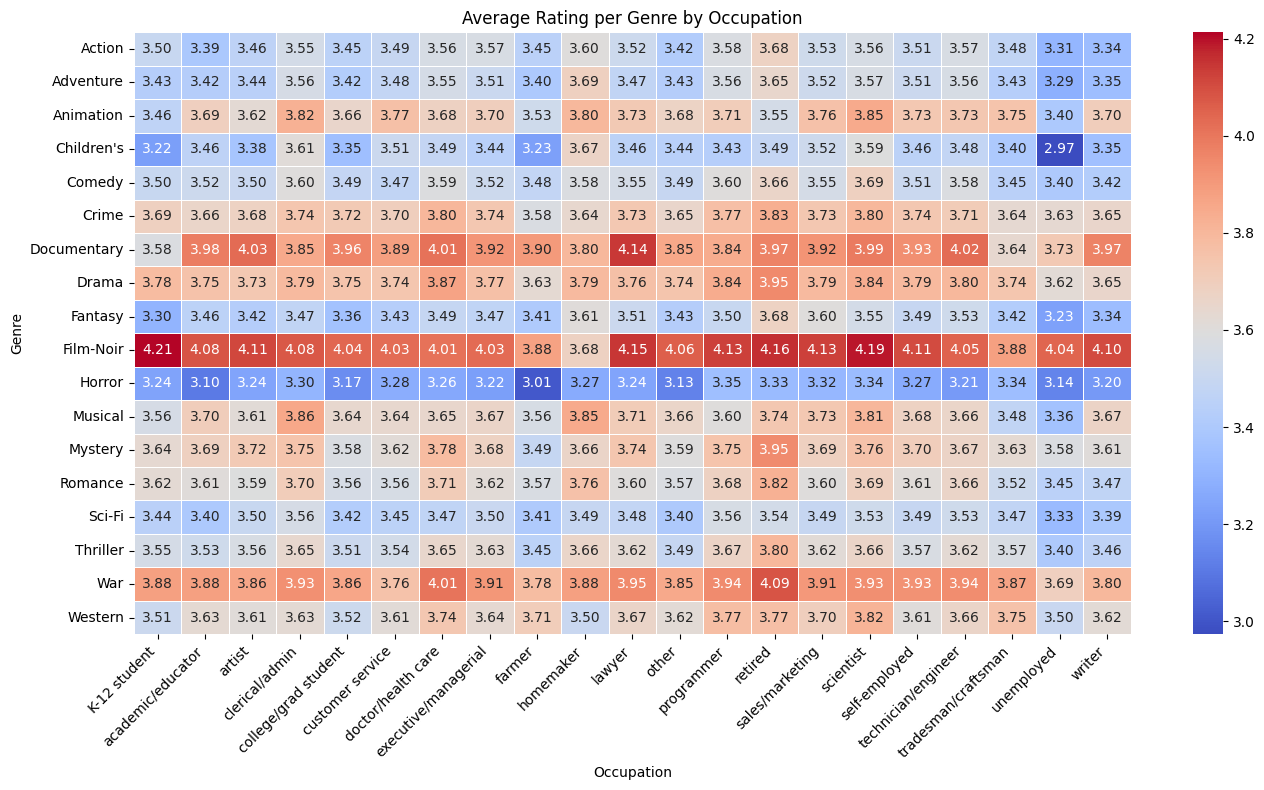

In [65]:
# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_occ, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Average Rating per Genre by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Genre")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Zipcode exploration

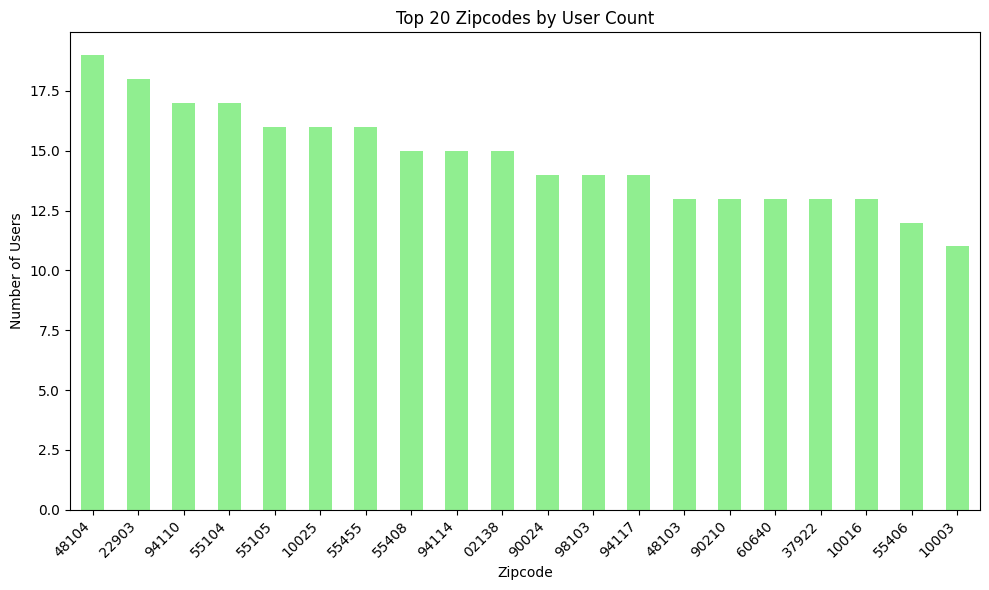

In [67]:
zipcode_counts = df[['UserID', 'Zipcode']].drop_duplicates()['Zipcode'].value_counts()

plt.figure(figsize=(10, 6))
zipcode_counts.head(20).plot(kind='bar', color='lightgreen')

plt.title("Top 20 Zipcodes by User Count")
plt.xlabel("Zipcode")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


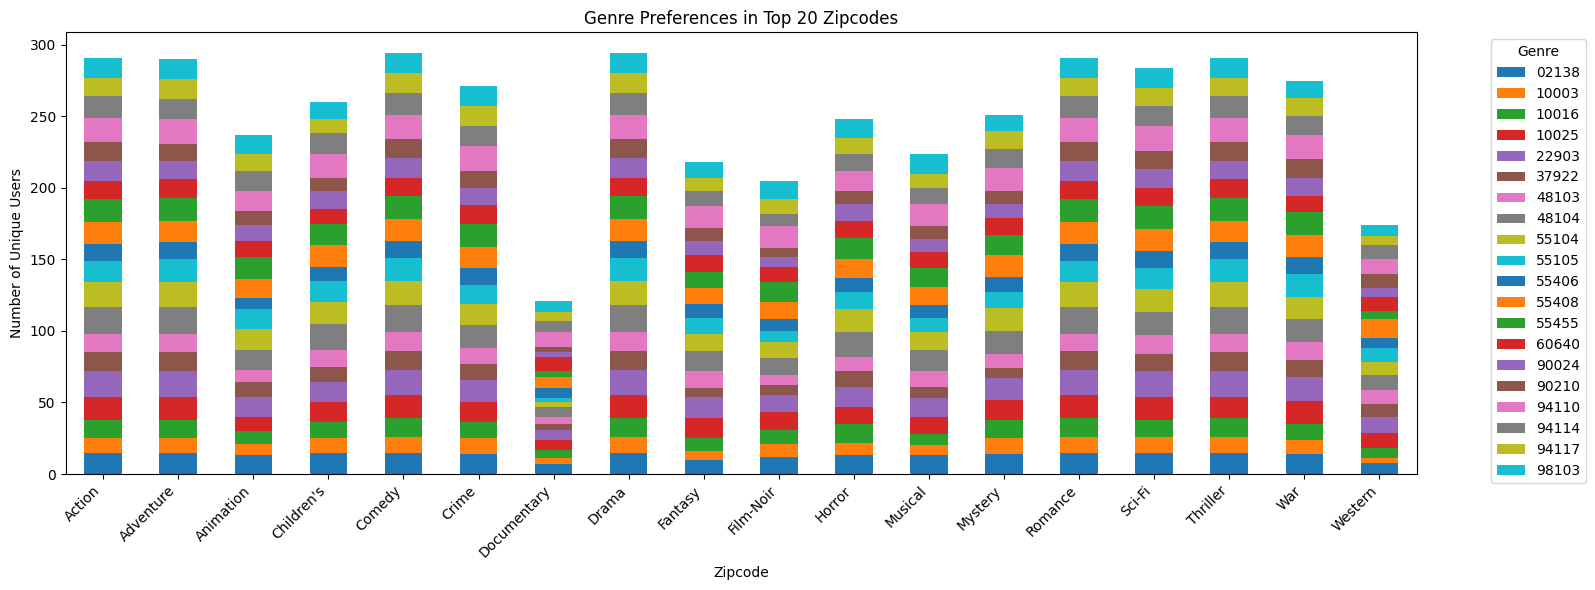

In [73]:
top_zipcodes = zipcode_counts.head(20).index

genre_pref_zip = (
    df[df['Zipcode'].isin(top_zipcodes)]
    .groupby(['Zipcode', 'Genres'])['UserID']
    .nunique()
    .unstack(fill_value=0)
)

# Plot
genre_pref_zip.T.plot(kind='bar', figsize=(16, 6), stacked=True)

plt.title("Genre Preferences in Top 20 Zipcodes")
plt.xlabel("Zipcode")
plt.ylabel("Number of Unique Users")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


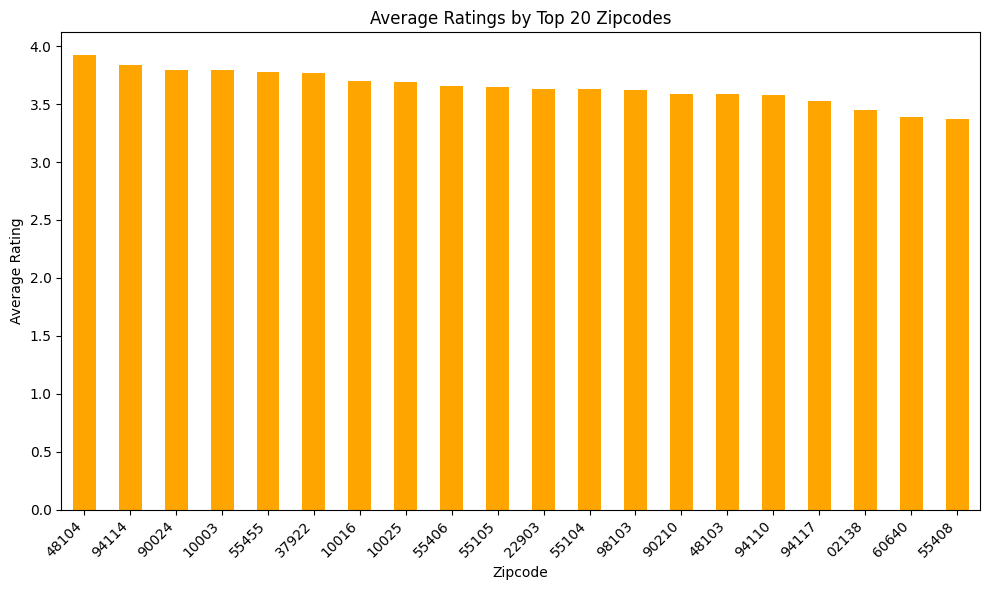

In [74]:
avg_ratings_zipcode = (
    df[df['Zipcode'].isin(top_zipcodes)]
    .groupby('Zipcode')['Rating']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
avg_ratings_zipcode.plot(kind='bar', color='orange')

plt.title("Average Ratings by Top 20 Zipcodes")
plt.xlabel("Zipcode")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
